Primero conectar google.colab con drive para poder extraer la información.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importar las librerias necesarias para realizar el análisis exploratorio de datos.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Establecer apariencia general de los gráficos

In [ ]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11,9.4)

Leer los datos

In [ ]:
df= pd.read_parquet('/content/drive/MyDrive/ML Projects/train.parquet', engine= 'pyarrow') #train
#df= pd.read_parquet('/content/drive/MyDrive/ML Projects/test.parquet', engine= 'pyarrow') #test

## ANALISIS EXPLORATORIO DE DATOS

### Visión General

Comprender las dimensiones del dataset visaulizando las primeras 5 filas.

In [ ]:
df.head(5)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn


¿Qué tamaño tiene el dataframe?

In [ ]:
df.shape

(346479, 22)


¿Qué tipo de datos contiene cada columna? 
*Resulta extraño que la columna 'baths' sea de tipo float y no int.*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

¿Cuantas dimensiones de cada tipo de dato tenemos en el dataframe?

In [ ]:
df.dtypes.value_counts()

int64      10
object      9
float64     3
dtype: int64

###Valores Faltantes 

Analicemos los valores nulos ¿Cuántos valores nulos tenemos en el total en el conjunto de datos?

In [ ]:
df.isnull().sum().sum()

201299

¿Cuántos tenemos por cada dimensión?

In [ ]:
df.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
dtype: int64

Graficamente observamos los valores nulos y podemos decir que representan menos del 5% en lat y long , un poco más de 20% en laundry_options y casi el 40% en parking_options .

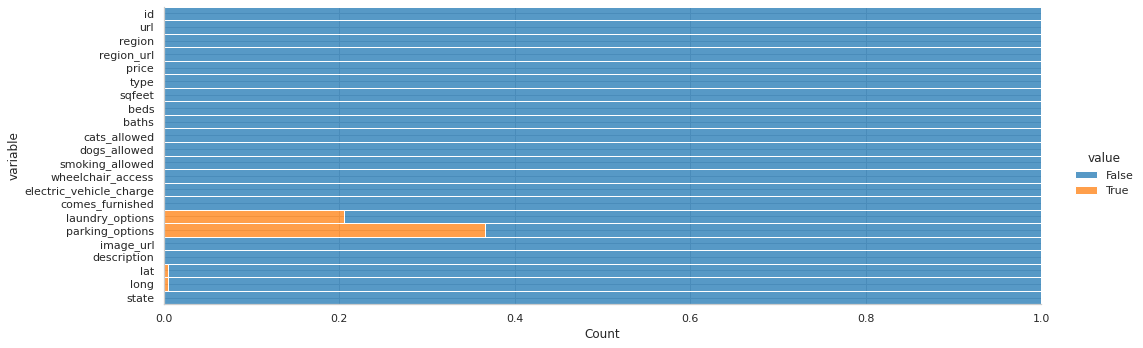

In [ ]:
(df.isnull().melt().pipe(lambda df: (sns.displot(data=df,y='variable',hue='value',multiple='fill',aspect=3))))

### Análisis de presición (errores en los datos)

Vamos a analizar latitud y longitud. Vemos que el dataset contiene datos de los 50 estados y la capital , por lo que los valores para encontrarse dentro de EEUU deben estar entre

Latitud : 18.9 y 71.383
Longitud: -66.95 y -172.43

In [ ]:
state=df['state'].unique()
state.size

51

In [ ]:
df.lat.min(),df.lat.max(),df.long.min(),df.long.max()

(-43.5333, 102.036, -163.894, 172.633)

¿Cuántos valores se encuentran fuera del rango?

Latitud : 18.9 y 71.383 Longitud: -66.95 y -172.43



In [ ]:
#Latitud
len(df[df['lat']< 18.9 ]) , len(df[df['lat']> 73.383 ]) 

(17, 4)

In [ ]:
#Longitud
len(df[df['long']> -66.95]) , len(df[df['long']< -172.83]) 

(225, 0)

### Valores duplicados

Analizamos si existen registros duplicados en todo el dataframe. Obviamente obtenemos cero por el id único por registro. 


In [ ]:
df.duplicated().sum()

0

Es natural en la industria inmobiliaria que las mismas unidades se publiquen para su venta mas de una vez en distintos momentos o inclusive en diferentes páginas al mismo tiempo, por ello analizamos las coincidencias teniendo en cuenta determinadas columnas.

In [ ]:
df.duplicated(subset=['region','type','price','sqfeet','state','description']).sum()

72417

### Valores Atípicos

#### Variables Numéricas

Visión General

In [ ]:
df.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.464790e+05,3.464790e+05,3.464790e+05,346479.000000,346479.000000,346479.000000,346479.000000,346479.000000,346479.00000,346479.000000,346479.000000,344757.000000,344757.000000
mean,7.040988e+09,9.664420e+03,1.066326e+03,1.903189,1.480339,0.726803,0.707861,0.731738,0.08197,0.012792,0.048141,37.234363,-92.705415
std,8.802214e+06,4.703573e+06,2.018537e+04,3.162685,0.608246,0.445602,0.454746,0.443055,0.27432,0.112374,0.214065,5.550956,16.551071
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035988e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,33.453100,-100.784000
50%,7.043325e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,37.650100,-87.710800
75%,7.048431e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,41.137900,-81.174600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,102.036000,172.633000


#####Baths

Observar la distribución de los datos en la columna baths

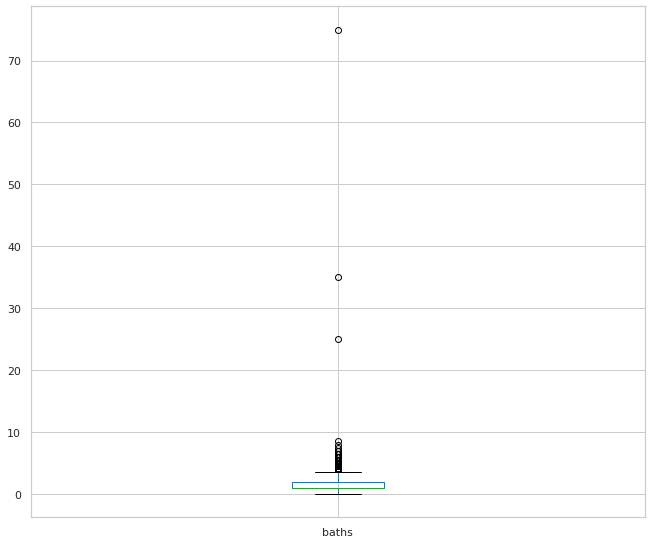

In [ ]:
boxplot = df.boxplot(column='baths')  

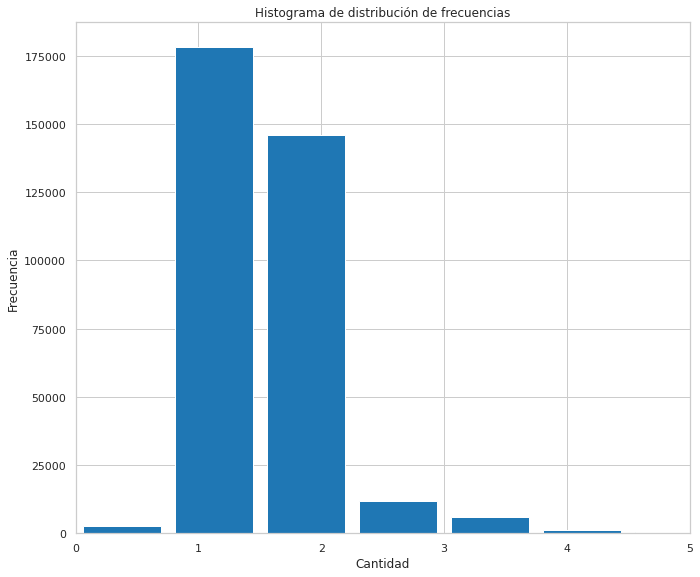

In [ ]:
plt.hist(x=df['baths'], bins=100, rwidth=0.85)
plt.title('Histograma de distribución de frecuencias')
plt.xlim(0,5) #limitamos el eje x por los outliers
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show() #dibujamos el histograma

Analizamos los valores únicos que toma la columna baths.

In [ ]:
df['baths'].unique()

array([ 2. ,  1. ,  1.5,  2.5,  0. ,  3.5,  4. ,  3. ,  4.5,  5. ,  6.5,
        5.5,  7. ,  6. , 25. ,  7.5, 35. ,  8. ,  8.5, 75. ])

Existen 3 filas con valores extraños por el momento, las dejamos , volveremos a ellas al momento de transformar el dataframe.

In [ ]:
bathoutliers=df[df['baths']>10]
bathoutliers

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
98062,7036731908,https://youngstown.craigslist.org/apa/d/youngs...,youngstown,https://youngstown.craigslist.org,550,apartment,250,1000,25.0,0,...,0,0,0,None,street parking,https://images.craigslist.org/00E0E_1pOzidFERz...,2 bedroom,41.0252,-80.6687,oh
252352,7008717287,https://keys.craigslist.org/apa/d/big-pine-key...,florida keys,https://keys.craigslist.org,1500,land,100,1000,35.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00X0X_8Uj7FjWxo3...,Only one lot available now from now to January...,24.6706,-81.3653,fl
316209,7045590325,https://chicago.craigslist.org/chc/apa/d/chica...,chicago,https://chicago.craigslist.org,2449,apartment,1000,1100,75.0,0,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01313_eF1HZRmyfa...,Furnished or Unfurnished Units Includes Parkin...,42.0195,-87.6650,il


Observar la distribución de los datos en la columna beds

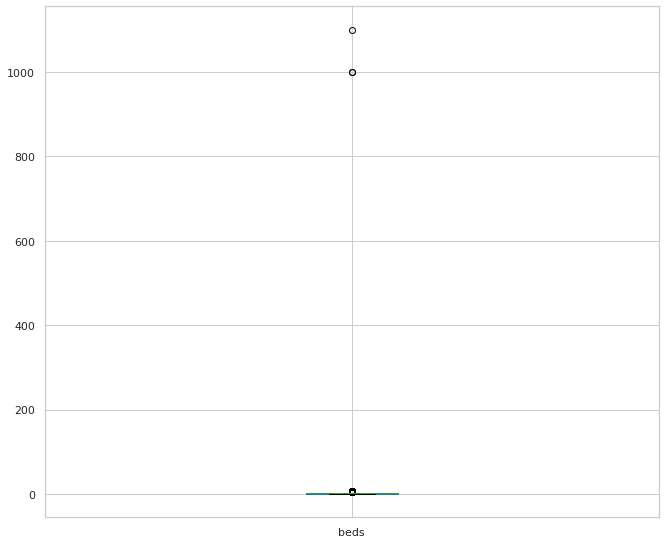

In [ ]:
boxplot = df.boxplot(column='beds') 

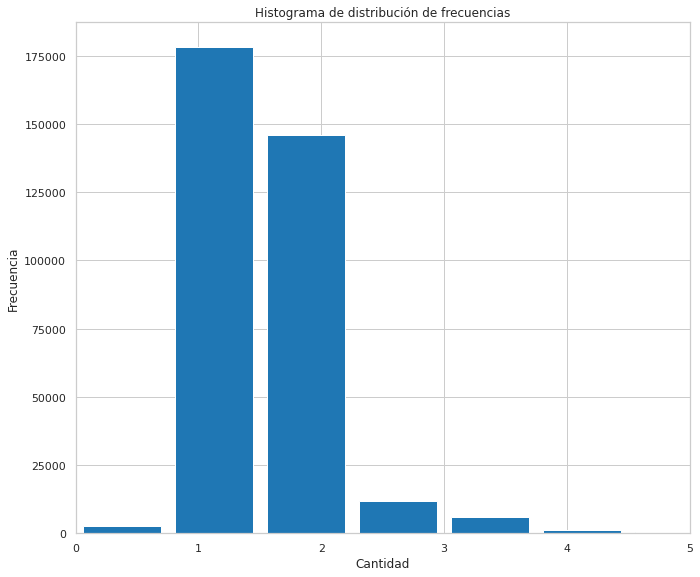

In [ ]:
plt.hist(x=df['baths'], bins=100, rwidth=0.85)
plt.title('Histograma de distribución de frecuencias')
plt.xlim(0,5) #limitamos el eje x por los outliers
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show() #dibujamos el histograma

#####Beds

Analizamos los valores únicos que toma la columna beds.

In [ ]:
df['beds'].unique()

array([   2,    1,    3,    5,    4,    0,    6,    8,    7, 1000, 1100])

Existen 3 filas con valores outliers.

In [ ]:
bedsoutliers=df[df['beds']>10]
bedsoutliers

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
98062,7036731908,https://youngstown.craigslist.org/apa/d/youngs...,youngstown,https://youngstown.craigslist.org,550,apartment,250,1000,25.0,0,...,0,0,0,None,street parking,https://images.craigslist.org/00E0E_1pOzidFERz...,2 bedroom,41.0252,-80.6687,oh
252352,7008717287,https://keys.craigslist.org/apa/d/big-pine-key...,florida keys,https://keys.craigslist.org,1500,land,100,1000,35.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00X0X_8Uj7FjWxo3...,Only one lot available now from now to January...,24.6706,-81.3653,fl
316209,7045590325,https://chicago.craigslist.org/chc/apa/d/chica...,chicago,https://chicago.craigslist.org,2449,apartment,1000,1100,75.0,0,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01313_eF1HZRmyfa...,Furnished or Unfurnished Units Includes Parkin...,42.0195,-87.6650,il


#####Price

Vemos la distribución de los precios según el tipo de propiedad y encontramos gran variabilidad.

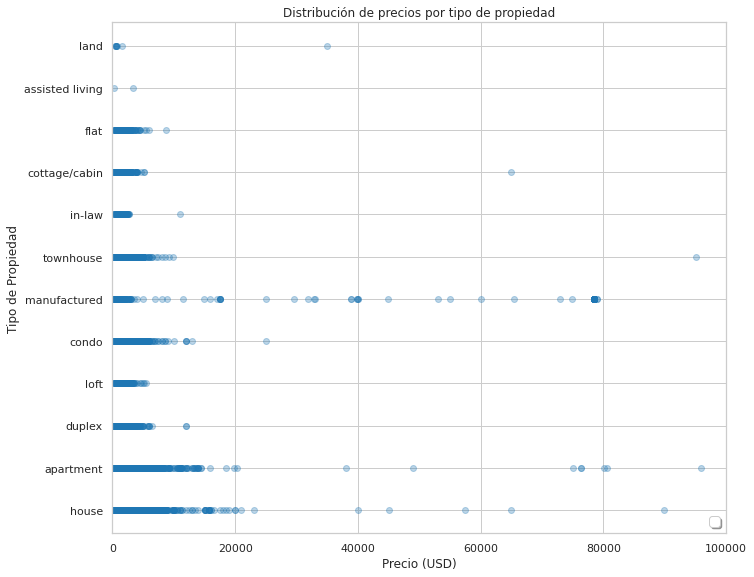

In [ ]:
x= df.price.values
y= df.type.values

fig = plt.figure()
ax = plt.axes()

# Graficamos putnos semi transparentes
ax.scatter(x, y,alpha = 0.3)

ax.set(xlabel='Precio (USD)', ylabel='Tipo de Propiedad',
       title='Distribución de precios por tipo de propiedad', xlim = (0,100000))

# Agregamos la leyenda al gráfico, la graficamos abajo a la derecha
ax.legend(loc='lower right', shadow=True, fontsize=13)

¿Hay valores imposibles por ejemplo menores o iguales a  0? , ¿Cuál es el valor máximo de la variable?

In [ ]:
df.price.min() , df.price.max()

(0, 2768307249)

Como observamos hay un gran outlier que nos afecta las medidas de posición y dispersión.

In [ ]:
df['price'].mean() , df['price'].median() ,df['price'].std() 

(9664.419699317996, 1036.0, 4703573.077756476)

Vamos a visualizar las unidades con precio mayor a 100 mil dólares

In [ ]:
priceoutliers=df[df['price']>100000]
priceoutliers.head(5)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
6103,7041151372,https://kalamazoo.craigslist.org/apa/d/kalamaz...,kalamazoo,https://kalamazoo.craigslist.org,8675301,house,1200,1,1.0,0,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00N0N_k7edJs0LrE...,Had a fall out. Text show contact info for i...,42.2650,-85.6190,mi
6288,7027971171,https://charleston.craigslist.org/apa/d/mannin...,charleston,https://charleston.craigslist.org,430000,house,2000,3,2.5,0,...,0,0,0,None,None,https://images.craigslist.org/00P0P_bWgwUZfrZG...,Check out this unique property! The all brick ...,33.6184,-80.2116,sc
6961,7039346849,https://onslow.craigslist.org/apa/d/jacksonvil...,jacksonville,https://onslow.craigslist.org,679710,apartment,842,1,1.0,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00000_80ADc0WCWu...,VIEW OUR WEBSITE: http://www.reserveatjackson...,34.7883,-77.3961,nc
7688,7027662572,https://onslow.craigslist.org/apa/d/jacksonvil...,jacksonville,https://onslow.craigslist.org,679710,apartment,918,1,1.0,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00L0L_rG9J0Gs1RK...,The Reserve at Jacksonville Commons is a pet f...,34.7883,-77.3961,nc
18462,7032831114,https://tricities.craigslist.org/apa/d/bristol...,tri-cities,https://tricities.craigslist.org,610745,apartment,750,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/01414_iZbDRsWESK...,Coming soon! 2 and 3 bedroom apartments ...,36.5919,-82.2188,tn


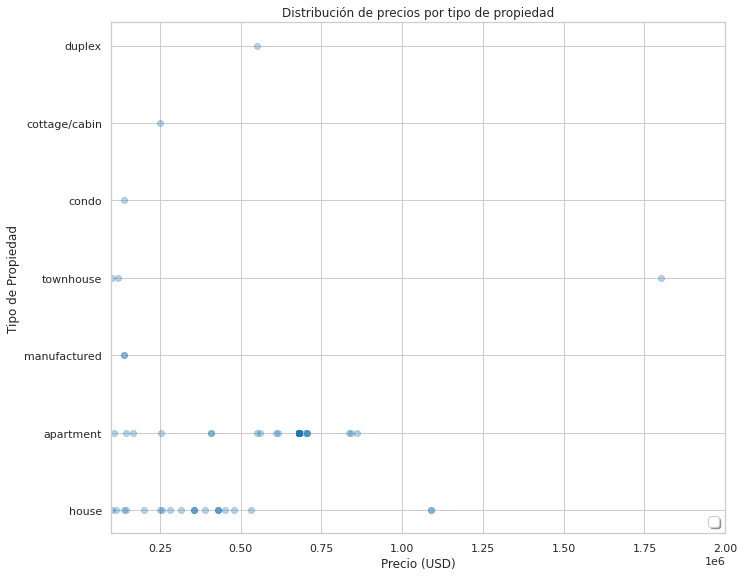

In [ ]:
x= priceoutliers.price.values
y= priceoutliers.type.values

fig = plt.figure()
ax = plt.axes()

# Graficamos putnos semi transparentes
ax.scatter(x, y,alpha = 0.3)

ax.set(xlabel='Precio (USD)', ylabel='Tipo de Propiedad',
       title='Distribución de precios por tipo de propiedad', xlim = (100000,2000000))

# Agregamos la leyenda al gráfico, la graficamos abajo a la derecha
ax.legend(loc='lower right', shadow=True, fontsize=13)

Profundizamos el análisis ya que es nuestra variable objetivo , para ello veremos que sucede si quitamos laos precios mayores a 500000 usd y los iguales a cero.

In [ ]:
pricesinoutliers=df[df['price']<500000]

In [ ]:
pricesinoutliers.drop(pricesinoutliers[(pricesinoutliers['price'] == 0)].index, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
pricesinoutliers.groupby(['type']).mean()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
type,,,,,,,,,,,,,
apartment,7.041171e+09,1161.971902,989.494831,1.735221,1.414434,0.762636,0.734982,0.752533,0.086882,0.012353,0.040083,37.125647,-92.551953
assisted living,7.034855e+09,1787.500000,1315.000000,3.500000,1.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,35.626800,-102.577150
condo,7.040671e+09,1626.285202,1150.926996,2.055605,1.660448,0.408430,0.401256,0.468341,0.089148,0.017937,0.202152,36.196356,-95.743139
cottage/cabin,7.039011e+09,1497.066667,946.692810,1.771242,1.511111,0.465359,0.499346,0.467974,0.043137,0.007843,0.317647,37.548143,-102.777313
duplex,7.040225e+09,1231.421668,1357.812665,2.347308,1.443954,0.393866,0.425419,0.406664,0.065755,0.005737,0.047661,38.820877,-98.461393
flat,7.042320e+09,1578.648936,1008.876596,1.934043,1.343617,0.685106,0.625532,0.608511,0.229787,0.204255,0.093617,37.192049,-92.397624
house,7.040038e+09,1588.957276,1641.864227,3.043260,1.862804,0.494107,0.538204,0.662225,0.065626,0.018181,0.092815,37.635644,-93.952265
in-law,7.042117e+09,1306.379085,680.986928,1.091503,1.022876,0.202614,0.189542,0.248366,0.019608,0.032680,0.372549,38.173741,-108.952120
land,7.031460e+09,4962.500000,530.000000,126.125000,5.250000,0.500000,0.625000,0.625000,0.000000,0.125000,0.375000,33.407337,-96.291975


Notamos que la media de los valores para el tipo land continua siendo elevada , por ello proponemos analizar el valor puntual.

In [ ]:
df1=pricesinoutliers.iloc[:,2:9]


In [ ]:
dfland=df1[df1['type']=='land']
dfland.groupby(['sqfeet']).mean()

,price,beds,baths
sqfeet,,,
36,550.0,1.0,1.0
100,1500.0,1000.0,35.0
204,35000.0,1.0,1.0
300,500.0,2.0,1.0
400,350.0,1.0,1.0
900,750.0,2.0,1.0
2000,550.0,0.0,1.0


#####Sqfeet

Distribución

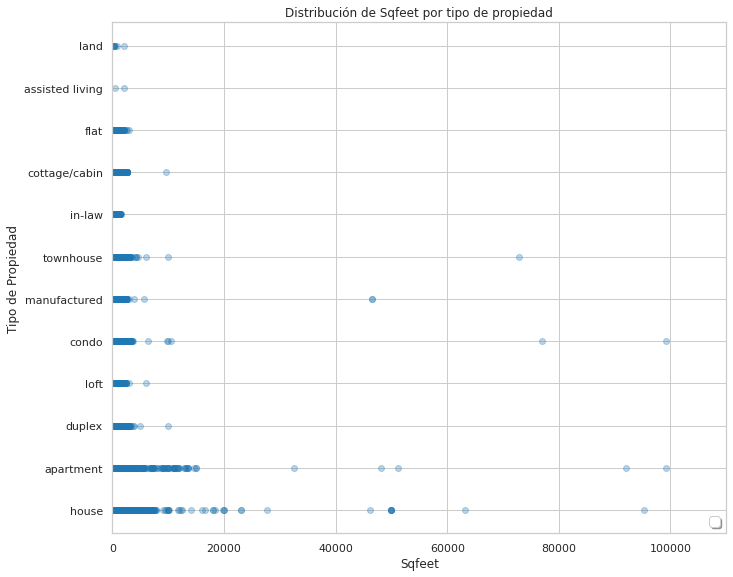

In [ ]:
x= df.sqfeet.values
y= df.type.values

fig = plt.figure()
ax = plt.axes()

# Graficamos putnos semi transparentes
ax.scatter(x, y,alpha = 0.3)

ax.set(xlabel='Sqfeet', ylabel='Tipo de Propiedad',
       title='Distribución de Sqfeet por tipo de propiedad', xlim = (0,110000))

# Agregamos la leyenda al gráfico, la graficamos abajo a la derecha
ax.legend(loc='lower right', shadow=True, fontsize=13)

¿Hay valores imposibles por ejemplo menoreso iguales a 0? , ¿Cuál es el valor máximo de la variable?

In [ ]:
df.sqfeet.min() , df.sqfeet.max()

(0, 8388607)

Como observamos hay un gran outlier que nos afecta las medidas de posición y dispersión.

In [ ]:
df['sqfeet'].mean() , df['sqfeet'].median() ,df['sqfeet'].std()

(1066.3259100840166, 949.0, 20185.373353131607)

Profundizamos el análisis ya que es una variable importante , para ello veremos que sucede si quitamos los sqfeet mayores a 40000 y los iguales a cero.

In [ ]:
sqsinoutliers=df[df['price']<40000]

In [ ]:
sqsinoutliers.drop(sqsinoutliers[(sqsinoutliers['price'] == 0)].index, inplace=True)

In [ ]:
sqsinoutliers.groupby(['type']).mean()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
type,,,,,,,,,,,,,
apartment,7.041171e+09,1154.934679,989.492586,1.735216,1.414430,0.762642,0.734988,0.752536,0.086883,0.012353,0.040081,37.125597,-92.551993
assisted living,7.034855e+09,1787.500000,1315.000000,3.500000,1.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,35.626800,-102.577150
condo,7.040672e+09,1601.478292,1150.909221,2.055436,1.660388,0.408504,0.401328,0.468245,0.089164,0.017940,0.202189,36.196799,-95.746158
cottage/cabin,7.038989e+09,1088.146789,948.191350,1.773263,1.512451,0.465269,0.499345,0.466579,0.043250,0.007864,0.318480,37.520088,-102.725522
duplex,7.040225e+09,1231.421668,1357.812665,2.347308,1.443954,0.393866,0.425419,0.406664,0.065755,0.005737,0.047661,38.820877,-98.461393
flat,7.042320e+09,1578.648936,1008.876596,1.934043,1.343617,0.685106,0.625532,0.608511,0.229787,0.204255,0.093617,37.192049,-92.397624
house,7.040039e+09,1396.634856,1641.380022,3.042891,1.862514,0.494287,0.538418,0.662165,0.065644,0.018162,0.092853,37.637571,-93.955759
in-law,7.042117e+09,1306.379085,680.986928,1.091503,1.022876,0.202614,0.189542,0.248366,0.019608,0.032680,0.372549,38.173741,-108.952120
land,7.031460e+09,4962.500000,530.000000,126.125000,5.250000,0.500000,0.625000,0.625000,0.000000,0.125000,0.375000,33.407337,-96.291975


#### Variables Categóricas

##### Región

Cantidad de regiones

In [ ]:
len(df.region.unique())

404

##### Type

Cantidad de tipos de propiedad.

In [ ]:
len(df.type.unique())

12

Graficamos la distribucion de frecuencias por tipo de propiedad.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


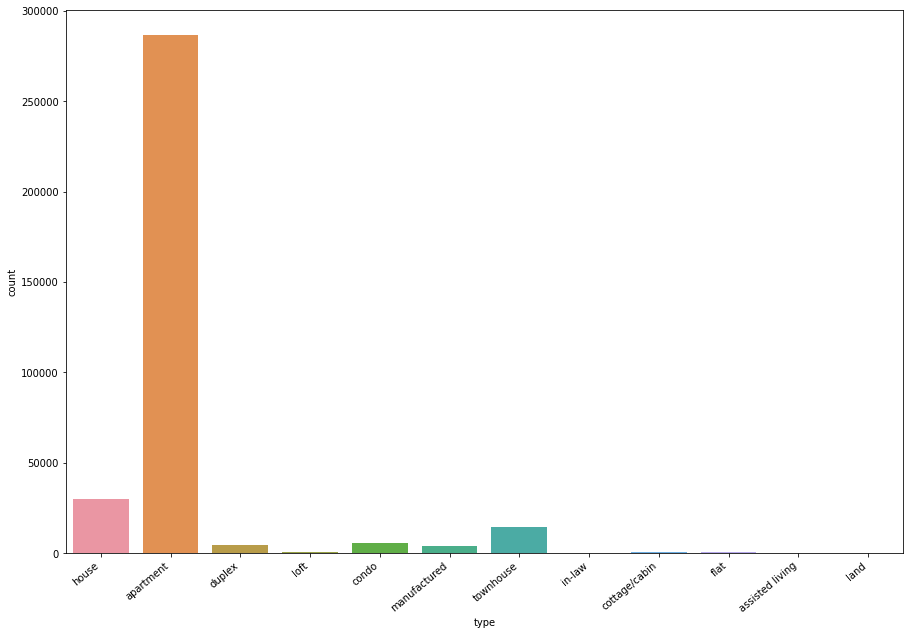

In [ ]:
plt.figure(figsize=(15,10)),
ax = sns.countplot(df['type'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

##### Otras

In [ ]:
df.cats_allowed.unique()

array([1, 0])

In [ ]:
df.dogs_allowed.unique()

array([1, 0])

In [ ]:
df.smoking_allowed.unique()

array([1, 0])

In [ ]:
df.wheelchair_access.unique()

array([0, 1])

In [ ]:
df.electric_vehicle_charge.unique()

array([0, 1])

### Matriz de Correlación

In [ ]:
data= df[["region", "price", "type", "sqfeet", "beds", "baths", "cats_allowed", "electric_vehicle_charge" , "comes_furnished" ,"laundry_options", "parking_options", "state" ]]

Text(0.5, 1.0, 'Heatmap de correlación del dataset ')

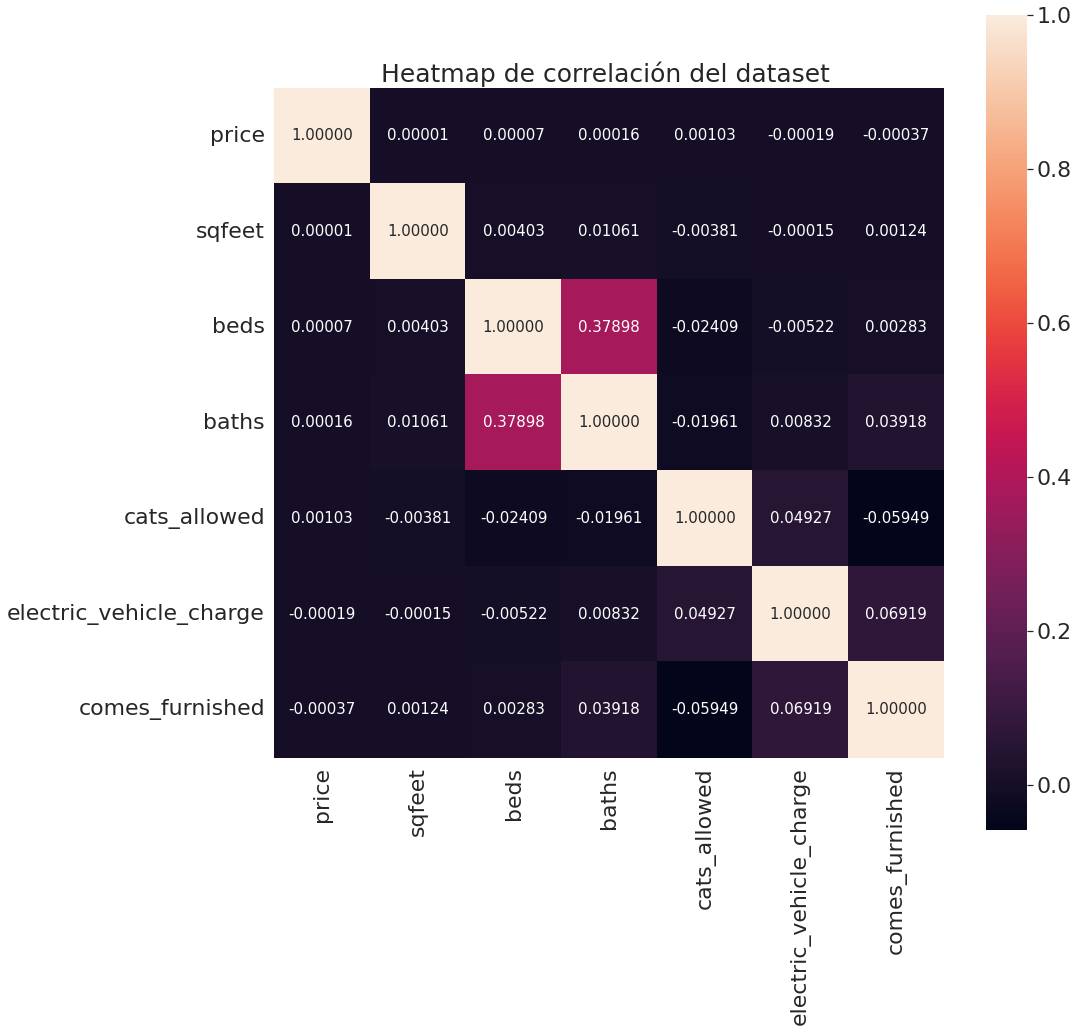

In [ ]:
corr = data.corr()
sns.set(font_scale=2)
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=True, square= True, fmt='.5f', annot=True, annot_kws={'size':15})
plt.title("Heatmap de correlación del dataset ", fontsize=25)